In [1]:
import pandas as pd

## Basic Data Exploration: Using Pandas to Get Familiar With Your Data

In [39]:
# save filepath to variable for easier access
melbourne_file_path = 'melb_data.csv'

# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 
df = melbourne_data

#Basic Data Frame infos
#df.shape
#list(df.columns)
#df.head()
#df.tail()
#df.info()

#print a summary of the data in Melbourne data
melbourne_data.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,11826.787073,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,6800.710448,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,5936.750000,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,11820.500000,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,17734.250000,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Exploratory Data Analysis

### Missing Data

In [35]:
# We can use isnull api of DataFrame is check if the data is Null or NA
melbourne_data.isnull()
# However this will print all the rows and columns that has NULL data
# Looking at all the rows can be tiresome process.
# Instead, We can use seaborn to create a simple heatmap to see where we are missing data!

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15388,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


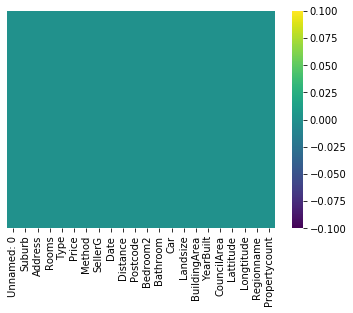

In [37]:
import seaborn as sns

# sns.heatmap
# First parameter:  If a Pandas DataFrame is provided, 
#                   the index/column information will be used to label the columns and rows
# Second Parameter: We are specifying that we do not need to label y-axis
# Third parameter: Color combination to be used
sns.heatmap(melbourne_data.isnull(),yticklabels=False,cmap='viridis')

#By looking at the below heatmap, we can guess that "Building area", "Year built"
#Has significant missing values

In [40]:
# Once we get an idea on columns where data is missing
# We can use pick up that column, run isnull().sum()
# to get the count of the column missing
melbourne_data_bldg_area=melbourne_data['BuildingArea']
mba_missing = melbourne_data_bldg_area.isnull().sum()
print("No of rows missing data for BuildingArea:",mba_missing)

melbourne_data_year_built=melbourne_data['YearBuilt']
myb_missing = melbourne_data_year_built.isnull().sum()
print("No of rows missing data for YearBuilt:",myb_missing)

No of rows missing data for BuildingArea: 10634
No of rows missing data for YearBuilt: 9438


### Some more data analysis

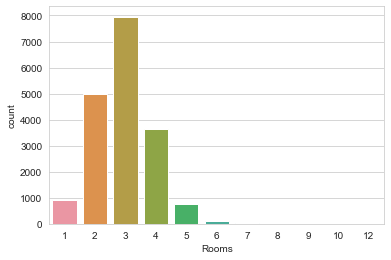

In [41]:
# Lets use count graph to check the number of houses with different rooms
sns.set_style('whitegrid')
sns.countplot(x='Rooms',data=melbourne_data)

# Plots show that we have maximum avaliability of 3 bed-room houses, 
# followed by 2 bed-room and 4 bed-room houses

### Handling Missing data

In [ ]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.  
# Your Iowa data doesn't have missing values in the columns you use. 
# So we will take the simplest option for now, and drop houses from our data. 
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)

## Selecting The Prediction Target

In [17]:
# You can pull out a variable with dot-notation. 
# This single column is stored in a Series, which is broadly like a DataFrame with only a single column of data.
# We'll use the dot notation to select the column we want to predict, which is called the prediction target. 
# By convention, the prediction target is called y. 
y = melbourne_data.Price

## Choosing "Features"

In [12]:
# Choosing "Features"
# The columns that are inputted into our model (and later used to make predictions) are called "features." 
# In our case, those would be the columns used to determine the home price. 
# Sometimes, you will use all columns except the target as features. 
# Other times you'll be better off with fewer features.
# For now, we'll build a model with only a few features. 
# Later on you'll see how to iterate and compare models built with different features.
# We select multiple features by providing a list of column names inside brackets. 
#Each item in that list should be a string (with quotes).
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

# By convention, this data is called X.
X = melbourne_data[melbourne_features]

X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


## Building Your Model

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

## More data from Regressor

In [25]:
melbourne_model.get_depth()

29

In [26]:
melbourne_model.get_n_leaves()

6017

In [28]:
melbourne_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

## Making predictions

In [14]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


### Visualising DecisionTree Regressor

In [ ]:
#Visualising regressor tree
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(melbourne_model, out_file ='tree.dot', 
               feature_names=melbourne_features) 

## Model Evaluation

What is Model Validation?
You'll want to evaluate almost every model you ever build. In most (though not all) applications, the relevant measure of model quality is predictive accuracy. In other words, will the model's predictions be close to what actually happens.

Many people make a huge mistake when measuring predictive accuracy. They make predictions with their training data and compare those predictions to the target values in the training data. You'll see the problem with this approach and how to solve it in a moment, but let's think about how we'd do this first.

You'd first need to summarize the model quality into an understandable way. If you compare predicted and actual home values for 10,000 houses, you'll likely find mix of good and bad predictions. Looking through a list of 10,000 predicted and actual values would be pointless. We need to summarize this into a single metric.

There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE). Let's break down this metric starting with the last word, error.

The prediction error for each house is:
error=actual−predicted
So, if a house cost $150,000 and you predicted it would cost $100,000 the error is $50,000.

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality. In plain English, it can be said as
"On average, our predictions are off by about X."

### Model Evaluation: Using Mean Absolute Error

In [18]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

### Model Evaluation: The Problem with "In-Sample" evaluation

The measure we just computed can be called an "in-sample" score. We used a single "sample" of houses for both building the model and evaluating it. Here's why this is bad.

Imagine that, in the large real estate market, door color is unrelated to home price.

However, in the sample of data you used to build the model, all homes with green doors were very expensive. The model's job is to find patterns that predict home prices, so it will see this pattern, and it will always predict high prices for homes with green doors.

Since this pattern was derived from the training data, the model will appear accurate in the training data.

But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice.

Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called validation data.

### Model Evaluation: Use sickit learn to split learning data and testing data

In [45]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Define model
melbourne_model = DecisionTreeRegressor()

# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

# Your mean absolute error for the in-sample data was about 500 dollars. Out-of-sample it is more than 250,000 dollars.
# This is the difference between a model that is almost exactly right, and one that is unusable for most practical purposes. As a point of reference, the average home value in the validation data is 1.1 million dollars. So the error in new data is about a quarter of the average home value.
# There are many ways to improve this model, such as experimenting to find better features or different model types.

275334.17882504844
